In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


#Load data from repository folder
states_data = pd.read_csv('COVID19_state.csv')
covid_data = pd.read_csv('us_states_covid19_daily.csv')

In [69]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15633 entries, 0 to 15632
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         15633 non-null  int64  
 1   state                        15633 non-null  object 
 2   positive                     15481 non-null  float64
 3   probableCases                5449 non-null   float64
 4   negative                     15323 non-null  float64
 5   pending                      1684 non-null   float64
 6   totalTestResultsSource       15633 non-null  object 
 7   totalTestResults             15598 non-null  float64
 8   hospitalizedCurrently        12516 non-null  float64
 9   hospitalizedCumulative       9434 non-null   float64
 10  inIcuCurrently               7713 non-null   float64
 11  inIcuCumulative              2700 non-null   float64
 12  onVentilatorCurrently        6211 non-null   float64
 13  onVentilatorCumu

In [70]:
covid_data['date_format'] = pd.to_datetime(covid_data['date'], format="%Y%m%d")
covid_data['month'] = pd.DatetimeIndex(covid_data['date_format']).month
months_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}
covid_data['month_name'] = covid_data['month'].map(months_dict)

In [71]:
states_data['%pop_infected'] = states_data['Infected']/states_data['Population']
states_data['%pop_tested'] = states_data['Tested']/states_data['Population']
states_data['%pop_dead'] = states_data['Deaths']/states_data['Population']

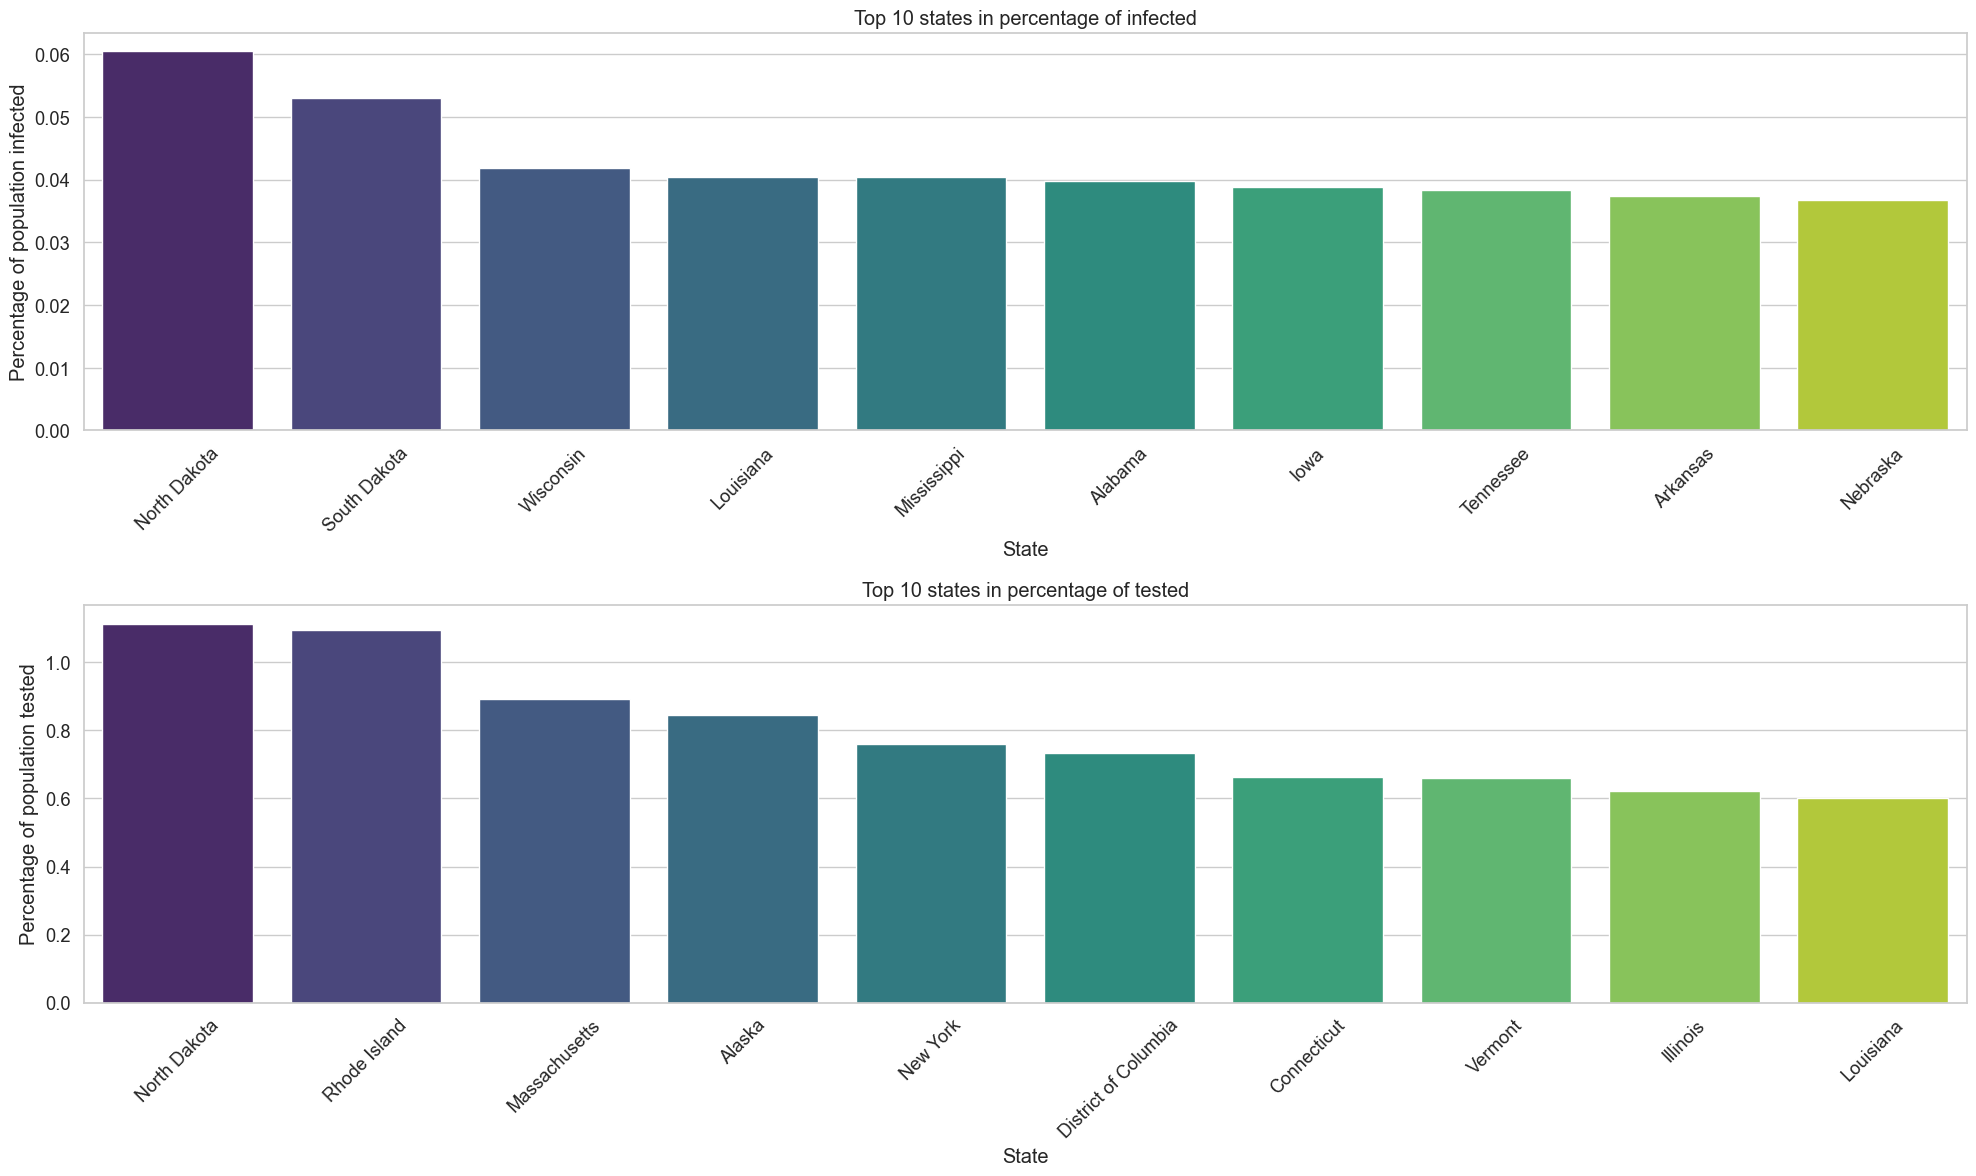

In [106]:
#Getting the top 10 states from different categories
sorted_infected = states_data.sort_values('Infected', ascending=False).head(10)
sorted_density = states_data.sort_values('Pop Density', ascending=False).head(10)
sorted_death = states_data.sort_values('Deaths', ascending=False).head(10)
sorted_smoking = states_data.sort_values('Smoking Rate', ascending=False).head(10)
sorted_porc_inf = states_data.sort_values('%pop_infected', ascending=False).head(10)
sorted_porc_tes = states_data.sort_values('%pop_tested', ascending=False).head(10)
sorted_porc_dead = states_data.sort_values('%pop_dead', ascending=False).head(10)

sns.set_theme(font_scale=1.2)
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(20, 12))  # 2 rows, 1 column for 2 subplots

# Define a custom color palette 
# Set the color palette for your plots
custom_palette = sns.color_palette("viridis", n_colors=10)
sns.set_palette(custom_palette)


'''# 1st plot Num Infected
sns.barplot(x='State', y='Infected', data=sorted_infected, ax=axes[0,0])
axes[0,0].set_xlabel('State')
axes[0,0].set_ylabel('Number of infected')
axes[0,0].set_title('Top 10 states of infected by population')
plt.setp(axes[0,0].xaxis.get_majorticklabels(), rotation=45)

# 2nd plot Pop Density
sns.barplot(x='State', y='Pop Density', data=sorted_density, ax=axes[0,1])
axes[0,1].set_xlabel('State')
axes[0,1].set_ylabel('Population Density')
axes[0,1].set_title('Top 10 states with higher population density')
plt.setp(axes[0,1].xaxis.get_majorticklabels(), rotation=45)

# 3rd plot Num Deaths
sns.barplot(x='State', y='Deaths', data=sorted_death, ax=axes[1,0])
axes[1,0].set_xlabel('State')
axes[1,0].set_ylabel('Number of deaths')
axes[1,0].set_title('Top 10 states in number of deaths')
plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=45)

# 4th plot Rate Smokers
sns.barplot(x='State', y='Smoking Rate', data=sorted_smoking, ax=axes[1,1])
axes[1,1].set_xlabel('State')
axes[1,1].set_ylabel('Smoking rate')
axes[1,1].set_title('Top 10 states with highest rates of smokers')
plt.setp(axes[1,1].xaxis.get_majorticklabels(), rotation=45)'''

# 5th plot
sns.barplot(x='State', y='%pop_infected', data=sorted_porc_inf, ax=axes[0])
axes[0].set_xlabel('State')
axes[0].set_ylabel('Percentage of population infected')
axes[0].set_title('Top 10 states in percentage of infected')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

# 6th plot
sns.barplot(x='State', y='%pop_tested', data=sorted_porc_tes, ax=axes[1])
axes[1].set_xlabel('State')
axes[1].set_ylabel('Percentage of population tested')
axes[1].set_title('Top 10 states in percentage of tested')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

'''# 7th plot
sns.barplot(x='State', y='%pop_dead', data=sorted_porc_dead, ax=axes[3,0])
axes[3,0].set_xlabel('State')
axes[3,0].set_ylabel('Porcentage of dead population')
axes[3,0].set_title('Top 10 states in death rate')
plt.setp(axes[3,0].xaxis.get_majorticklabels(), rotation=45)'''


# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

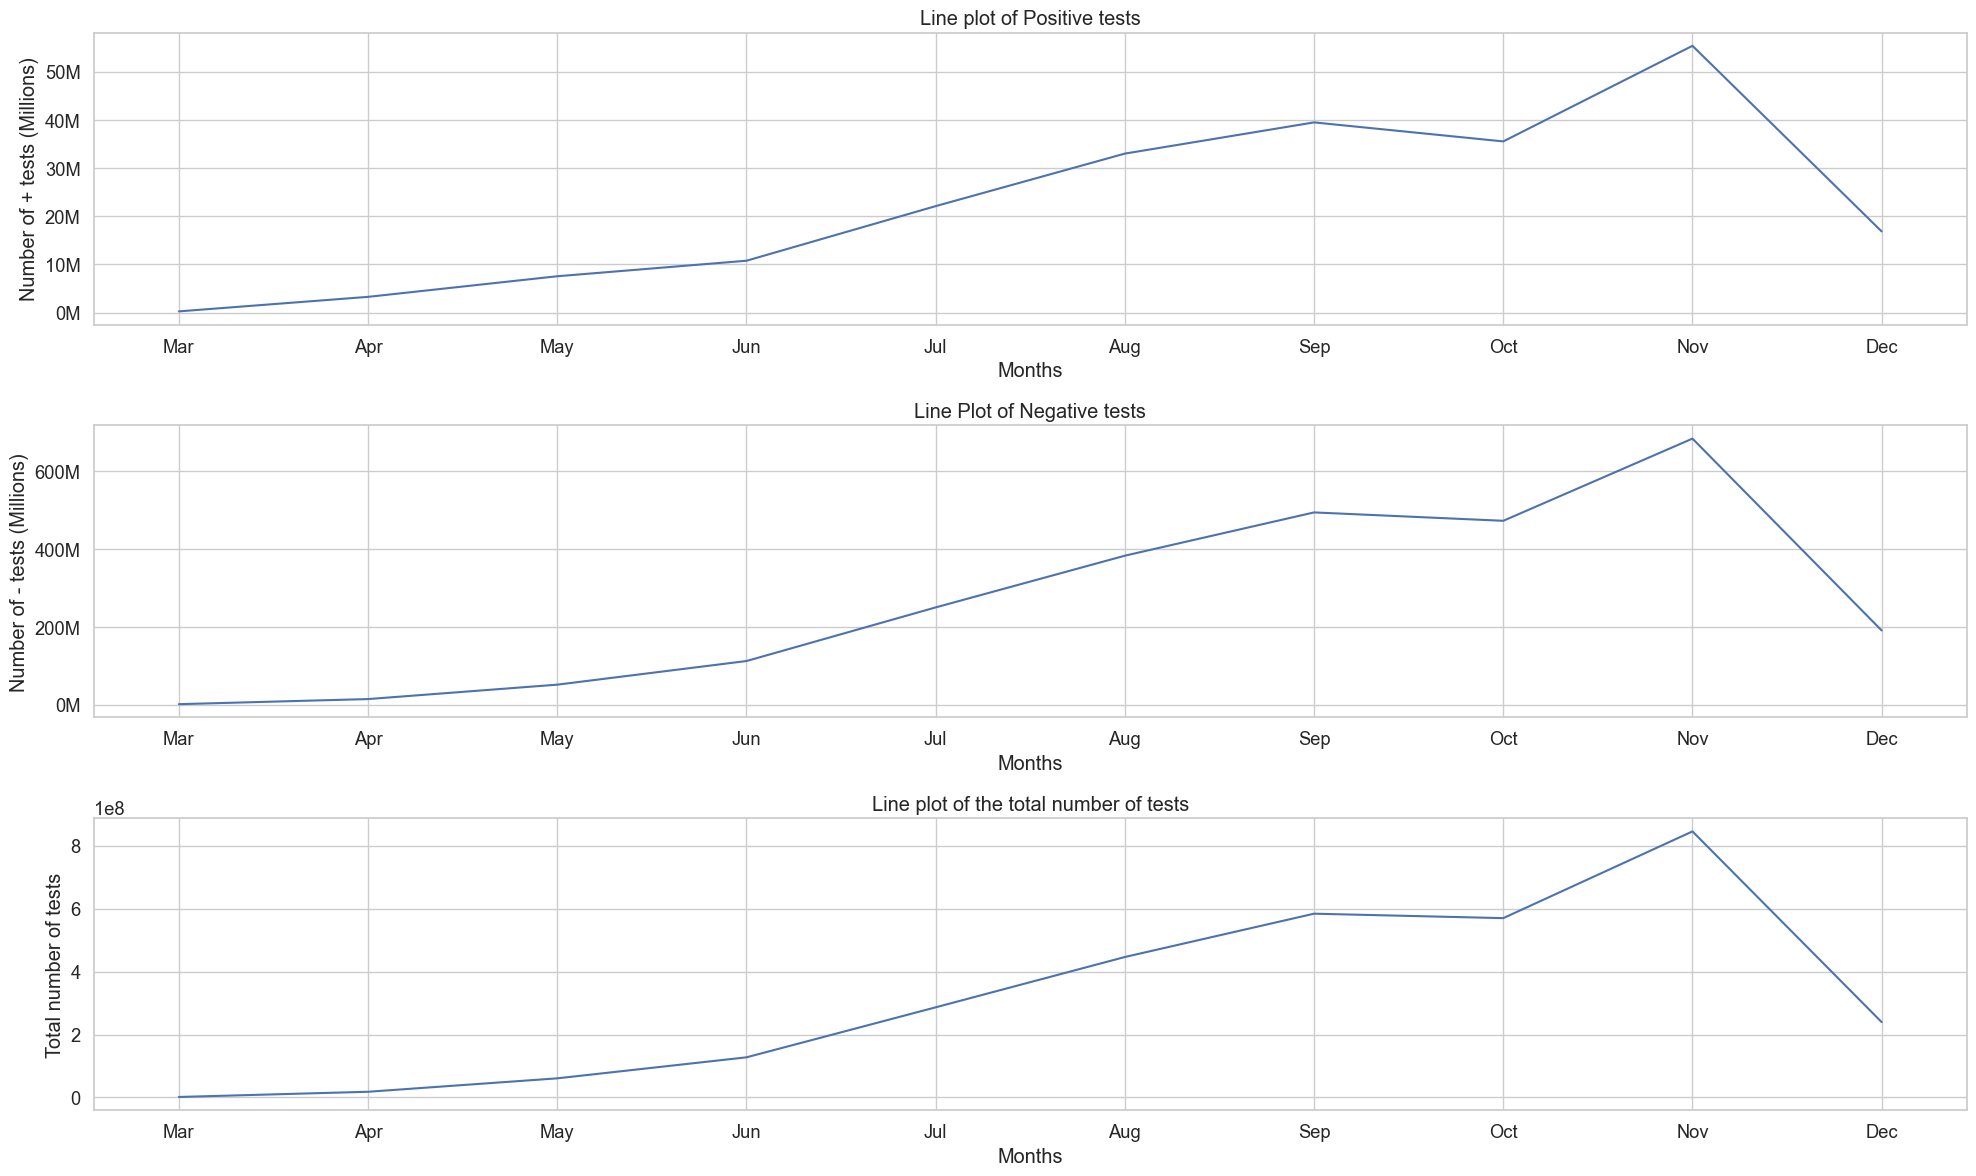

In [118]:
#Group by month and dataQuality
grouped_data1 = covid_data.groupby(by = ['month', 'month_name', 'dataQualityGrade']).agg({'positive':'sum', 'negative':'sum', 'death':'sum', 'hospitalized':'sum','totalTestResults':'sum'})
grouped_data2 = covid_data.groupby(['month', 'month_name']).agg({'positive':'sum', 'negative':'sum', 'death':'sum', 'hospitalized':'sum'})
grouped_data2['%Positives_Tests'] = grouped_data2['positive']/(grouped_data2['negative'] + grouped_data2['positive'])

# Create a bar plot of positives and negatives grouped by month
sns.set_theme(font_scale=1.2)
sns.set_style("whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(20,12))  # 4 row, 1 columns for 6 subplots


sns.lineplot(x='month_name', y='positive', data=grouped_data1, legend=True, ax=axes[0],ci=None)
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Number of + tests (Millions)')
axes[0].set_title('Line plot of Positive tests')

sns.lineplot(x='month_name', y='negative', data=grouped_data1,  legend=True, ax=axes[1],ci=None)
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Number of - tests (Millions)')
axes[1].set_title('Line Plot of Negative tests')

sns.lineplot(x='month_name', y='totalTestResults', data=grouped_data1, ax=axes[2],ci=None)
axes[2].set_xlabel('Months')
axes[2].set_ylabel('Total number of tests')
axes[2].set_title('Line plot of the total number of tests')

# Plot evolution of number of total test over time

# Create a custom formatter to show units in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

# Apply the custom formatter to the y-axis
formatter = FuncFormatter(millions_formatter)
axes[0].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

In [80]:
covid_data[covid_data['month']==4]['positive'].sum()

19644427.0

In [85]:
covid_data[covid_data['month']==4]['negative'].sum()

86387804.0

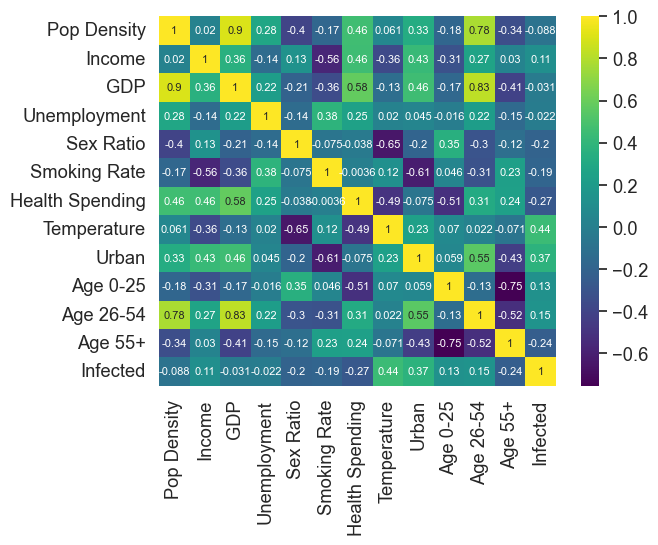

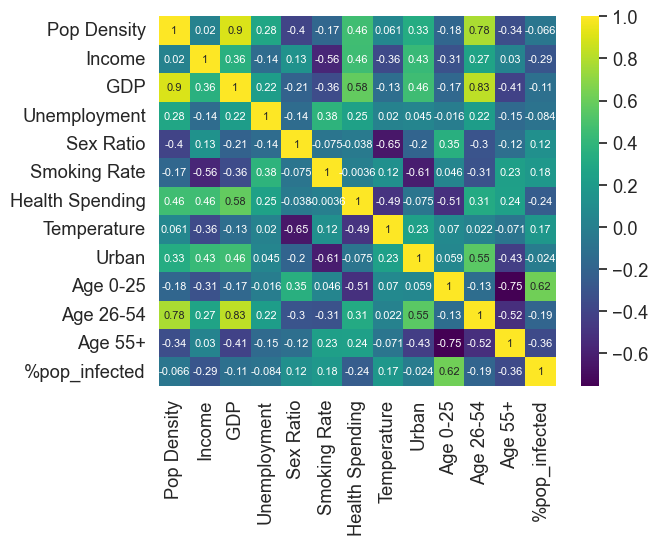

In [82]:
#Check for correlation between the different columns and the amount of infected
sel_cols = ['Pop Density', 'Income', 'GDP', 'Unemployment', 'Sex Ratio',
    'Smoking Rate', 'Health Spending', 'Temperature', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+']

corr_matrix = states_data[sel_cols + ['Infected']].corr()
corr_matrix
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 8}, cmap='viridis')
plt.show()

#Check for correlation between the different columns and the proportion of infected
sel_cols = ['Pop Density', 'Income', 'GDP', 'Unemployment', 'Sex Ratio',
    'Smoking Rate', 'Health Spending', 'Temperature', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+']

corr_matrix2 = states_data[sel_cols + ['%pop_infected']].corr()
corr_matrix2
sns.heatmap(corr_matrix2, annot=True, annot_kws={'size': 8}, cmap='viridis')
plt.show()


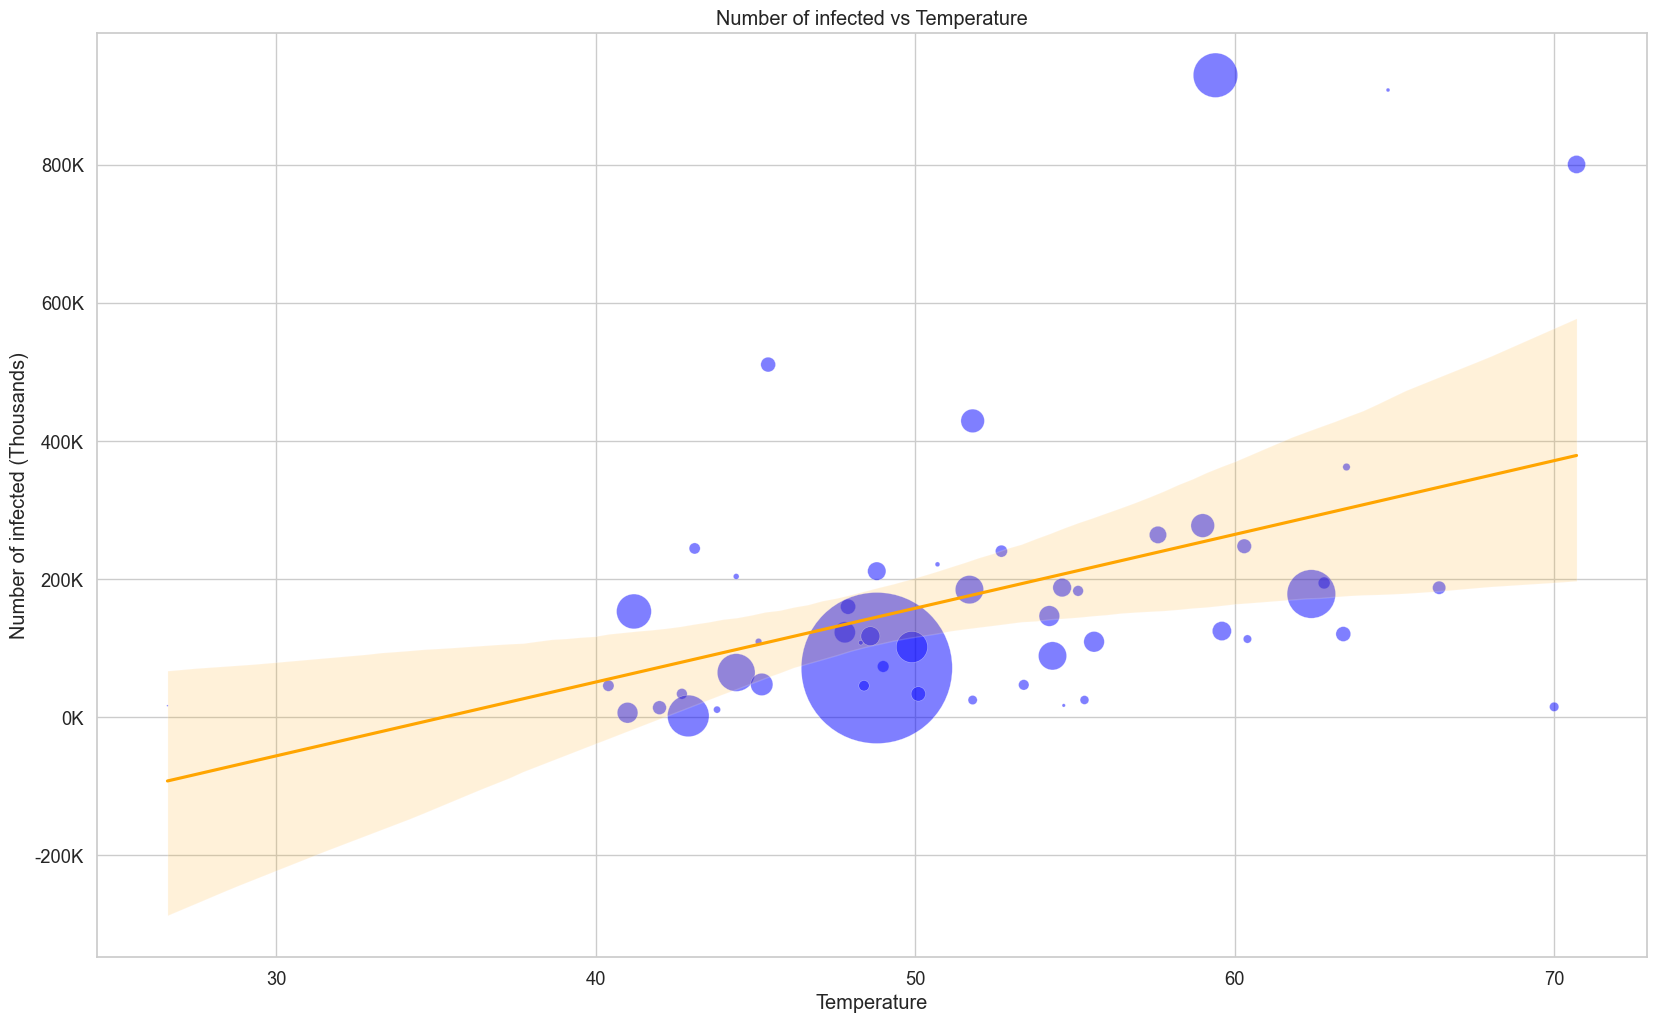

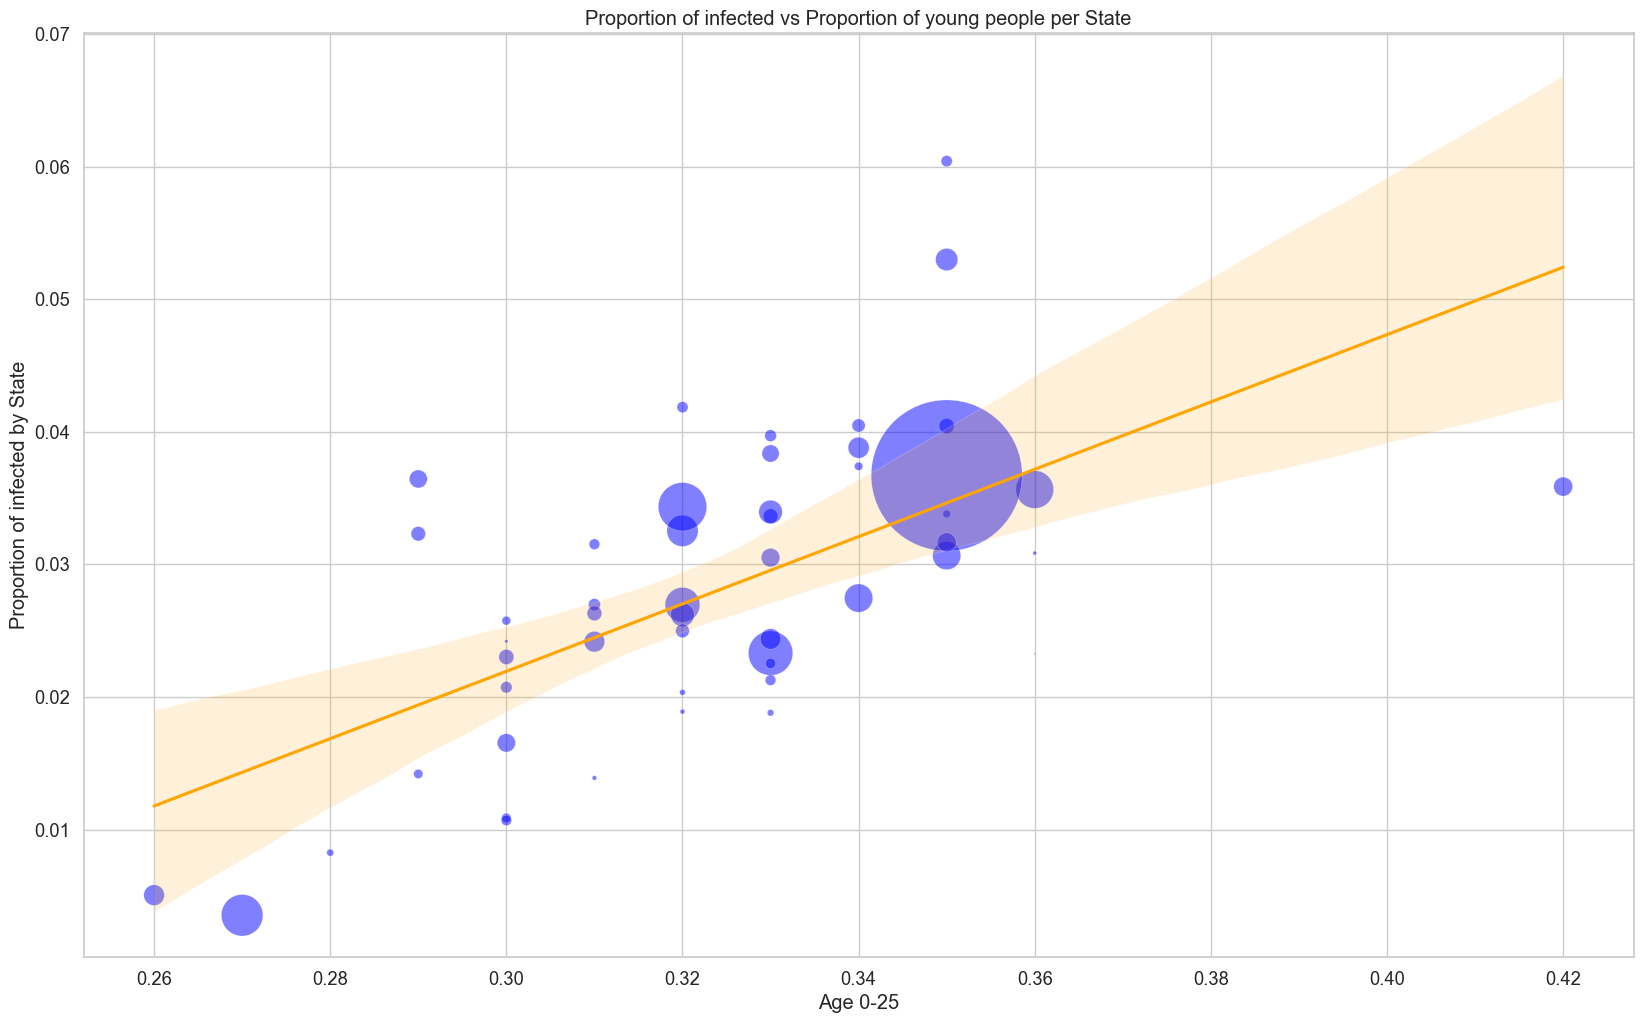

In [121]:
#Relation between percentage of young people and infected
sns.set_theme(font_scale=1.2)
sns.set_style("whitegrid")

plt.figure(figsize=(20,12))

sns.scatterplot(x='Temperature', y='Infected', data=states_data, size='Pop Density', sizes=states_data['Pop Density'].to_list(), color='Blue', alpha=0.5, legend=False)
sns.regplot(x='Temperature', y='Infected', data=states_data, scatter=False, color='Orange', label='Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Number of infected (Thousands)')
plt.title('Number of infected vs Temperature')

def thousands_formatter(x, pos):
    return f'{x/1e3:.0f}K'

formatter = FuncFormatter(thousands_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()



#Relation between percentage of young people (0-25) and proportion of infected
sns.set_theme(font_scale=1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(20,12))

sns.scatterplot(x='Age 0-25', y='%pop_infected', data=states_data, size='Pop Density', sizes=states_data['Pop Density'].to_list(), color='Blue', alpha=0.5, legend=False)
sns.regplot(x='Age 0-25', y='%pop_infected', data=states_data, scatter=False, color='Orange', label='Regression Line')
plt.xlabel('Age 0-25')
plt.ylabel('Proportion of infected by State')
plt.title('Proportion of infected vs Proportion of young people per State')

plt.show()




